In [121]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import html5lib
import requests
import numpy as np
import os


In [65]:
#Use BeautifulSoup and Selenium to scrape data from baseball-reference.com

url='https://www.baseball-reference.com/leagues/MLB/2017-value-pitching.shtml'

import os
chromedriver = "/Users/ryanmurray/Downloads/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver


driver = webdriver.Chrome(chromedriver)

driver.get(url)
soup = BeautifulSoup(driver.page_source,'lxml')
driver.quit()

In [103]:
def scrape(url):
    chromedriver = "/Users/ryanmurray/Downloads/chromedriver" # path to the chromedriver executable
    os.environ["webdriver.chrome.driver"] = chromedriver


    driver = webdriver.Chrome(chromedriver)

    driver.get(url)
    soup = BeautifulSoup(driver.page_source,'lxml')
    driver.quit()
    
    return soup

In [118]:
def parse_table(soup,table="table_name"):
    
    #takes table with "table_name" from scraped website and outputs pandas dataframe
    tab = soup.find("table",{"id": table})
    rows = tab.find_all('tr')
    
    #get header and remove leading and trailing blank strings
    header = rows[0].text.split('\n')
    header.remove('')
    header.remove('')
    
    #create list of rows
    rows_list = []
    for row in rows:
        cur_row = []
        for c in row:
            try: cur_row.append(c.text)
            except: cur_row.append('')
        if len(cur_row) == len(header):
            rows_list.append(cur_row)
            
    return pd.DataFrame(rows_list,columns=header)

In [105]:
def scrape_and_parse(url,table):
    soup = scrape(url)
    df = parse_table(soup, table)
    return df

In [23]:
#parse data into 

p_table = soup.find("table", {"id": "players_value_pitching"})
p_rows = p_table.find_all('tr')

p_header = p_rows[0].text.split('\n')
p_header.remove('')
p_header.remove('')

p_rows_list = []
for row in p_rows[1:]:
    cur_row = []
    for c in row:
        try:
            cur_row.append(c.text)
        except:
            cur_row.append('')
    if len(cur_row) == len(:
        p_rows_list.append(cur_row)

In [24]:
p_df = pd.DataFrame(p_rows_list, columns=p_header)

In [29]:
p_col = p_df.columns.tolist()

In [31]:
for col in p_col:
    try:
        p_df[col] = pd.to_numeric(p_df[col])
    except:
        pass

In [41]:
p_df['sal'] = pd.to_numeric(p_df['Salary'].apply(lambda x: (x.replace('$','').replace(',',''))))

In [47]:
p_short = p_df.dropna()

In [44]:
import matplotlib.pyplot as plt

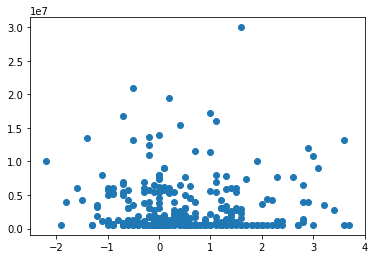

In [49]:
plt.scatter(p_short['WAR'],p_short['sal'])

(array([  3.,  10.,  38., 100.,  73.,  42.,  28.,  14.,  12.,   5.]),
 array([-2.2 , -1.61, -1.02, -0.43,  0.16,  0.75,  1.34,  1.93,  2.52,
         3.11,  3.7 ]),
 <a list of 10 Patch objects>)

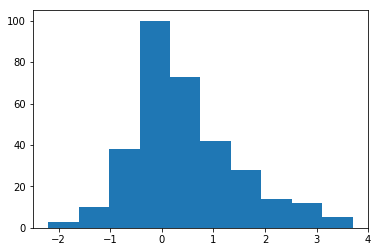

In [48]:
plt.hist(p_short['WAR'])

In [53]:
p_short['log_sal'] = p_short['sal'].apply(lambda x: np.log10(x))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


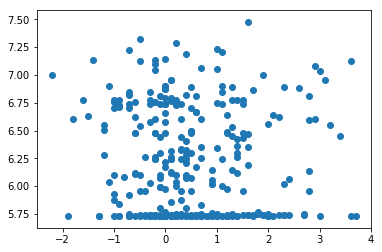

In [55]:
plt.scatter(p_short['WAR'],p_short['log_sal'])

In [56]:
p_abv_min = p_short[p_short['log_sal']>5.75]

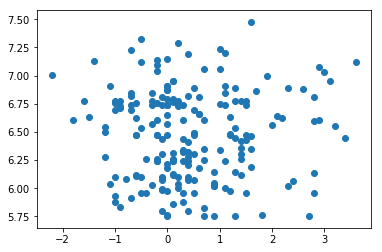

In [58]:
plt.scatter(p_abv_min['WAR'],p_abv_min['log_sal'])

In [59]:
corr = p_abv_min.corr()

In [60]:
import seaborn as sns

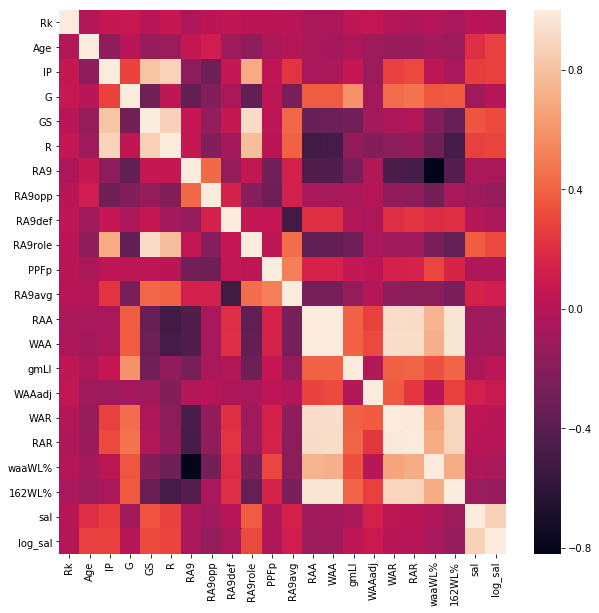

In [64]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr)

(array([15., 25., 30., 18., 28., 37., 24., 11.,  7.,  2.]),
 array([5.75089392, 5.92351665, 6.09613939, 6.26876212, 6.44138485,
        6.61400759, 6.78663032, 6.95925305, 7.13187579, 7.30449852,
        7.47712125]),
 <a list of 10 Patch objects>)

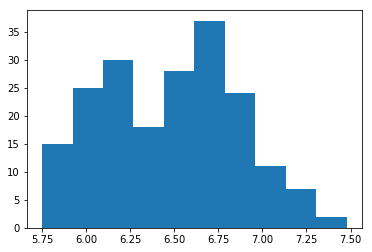

In [66]:
plt.hist(p_abv_min['log_sal'])

In [71]:
p_tw = p_abv_min[p_abv_min['G']>20]

In [68]:
p_short.shape

(325, 26)

In [69]:
p_df.shape

(755, 25)

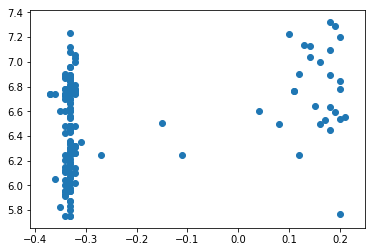

In [83]:
plt.scatter(p_tw['RA9role'],p_tw['log_sal'])

In [89]:
s = 'Fernando Abad*'
p = "Hello"

In [90]:
'*' in p

False

In [98]:
def is_lhp(p):
    return '*' in p


def drop_ast(n):
    return n.replace('*','')

In [99]:
p_df['lhp'] = p_df['Name'].apply(is_lhp)

p_df['Name'] = p_df['Name'].apply(drop_ast)

In [100]:
p_df

Rk                 Name  Age   Tm     IP   G  GS    R    RA9  RA9opp  \
0      1        Fernando Abad   31  BOS   43.2  48   0   18   3.71    4.78   
1      2         Austin Adams   26  WSN    5.0   6   0    4   7.20    4.88   
2      3          Tim Adleman   29  CIN  122.1  30  20   79   5.81    4.70   
3      4        Andrew Albers   31  SEA   41.0   9   6   22   4.83    4.78   
4      5          Matt Albers   34  WSN   61.0  63   0   12   1.77    4.70   
5      6      Al Alburquerque   31  2TM   18.0  21   0    5   2.50    4.80   
6      7       Raul Alcantara   24  OAK   24.0   8   4   21   7.88    4.86   
7      8      Sandy Alcantara   21  STL    8.1   8   0    6   6.48    4.64   
8      9     Victor Alcantara   24  DET    7.1   6   0    7   8.59    4.91   
9     10      Scott Alexander   27  KCR   69.0  58   0   23   3.00    4.80   
10    11           Cody Allen   28  CLE   67.1  69   0   24   3.21    4.77   
11    12       Miguel Almonte   24  KCR    2.0   2   0    3  13.50    5.13   
12    13        Dan Altavilla   24  SEA   46.2  41   0   27   5.21    5.06   
13    14        Jose Alvarado   22  TBR   29.2  35   0   12   3.64    4.89   
14    15        Dario Alvarez   28  TEX   16.1  20   0    8   4.41    4.96   
15    16    Henderson Alvarez   27  PHI   14.2   3   3    7   4.30    4.68   
16    17         Jose Alvarez   28  LAA   48.2  64   0   23   4.25    4.96   
17    18       Brett Anderson   29  2TM   55.1  13  13   41   6.67    4.71   
18    19       Chase Anderson   29  MIL  141.1  25  25   47   2.99    4.58   
19    20        Drew Anderson   23  PHI    2.1   2   0    7  27.00    4.86   
20    21       Tyler Anderson   27  COL   86.0  17  15   48   5.02    4.68   
21    22        Matt Andriese   27  TBR   86.0  18  17   48   5.02    4.76   
22    23       Norichika Aoki   35  HOU    1.0   1   0    3  27.00    5.17   
23    24        Jayson Aquino   24  BAL   13.1   4   2   12   8.10    4.67   
24    25         Victor Arano   22  PHI   10.2  10   0    2   1.69    5.04   
25    26         Chris Archer   28  TBR  201.0  34  34  101   4.52    4.72   
26    27      Shawn Armstrong   26  CLE   24.2  21   0   12   4.38    4.63   
27    28         Jake Arrieta   31  CHC  168.1  30  30   82   4.38    4.60   
28    29       Bronson Arroyo   40  CIN   71.0  14  14   59   7.48    4.60   
29    30           Alec Asher   25  BAL   60.0  24   6   36   5.40    4.60   
..   ...                  ...  ...  ...    ...  ..  ..  ...    ...     ...   
725  726      Aaron Wilkerson   28  MIL   10.1   3   2    4   3.48    4.68   
726  727      Taylor Williams   25  MIL    4.2   5   0    1   1.93    4.88   
727  728      Trevor Williams   25  PIT  150.1  31  25   73   4.37    4.66   
728  729          Alex Wilson   30  DET   60.0  66   0   34   5.10    4.79   
729  730        Justin Wilson   29  2TM   58.0  65   0   23   3.57    4.76   
730  731         Tyler Wilson   27  BAL   15.1   9   1   14   8.22    4.75   
731  732         Alex Wimmers   28  MIN    7.1   6   0    4   4.91    4.75   
732  733          Dan Winkler   27  ATL   14.1  16   0    4   2.51    4.81   
733  734          Matt Wisler   24  ATL   32.1  20   1   31   8.63    4.73   
734  735        Nick Wittgren   26  MIA   42.1  38   0   22   4.68    4.81   
735  736  Asher Wojciechowski   28  CIN   62.1  25   8   48   6.93    4.75   
736  737            Alex Wood   26  LAD  152.1  27  25   50   2.95    4.56   
737  738           Blake Wood   31  2TM   74.1  72   0   49   5.93    4.80   
738  739          Hunter Wood   23  TBR    0.1   1   0    0   0.00    4.62   
739  740          Travis Wood   30  2TM   94.0  39  14   77   7.37    4.77   
740  741     Brandon Woodruff   24  MIL   43.0   8   8   23   4.81    4.84   
741  742      Brandon Workman   28  BOS   39.2  33   0   17   3.86    4.79   
742  743         Vance Worley   29  MIA   71.2  24  12   56   7.03    4.76   
743  744        Daniel Wright   26  LAA   19.2   5   2   12   5.49    4.45   
744  745          Mike Wrigh

In [119]:
url_2016 = 'https://www.baseball-reference.com/leagues/MLB/2016-value-pitching.shtml'
table_name = 'players_value_pitching'

p_2016 = scrape_and_parse(url_2016,table_name)

In [120]:
p_2016

Rk               Name Age   Tm     IP   G  GS    R    RA9 RA9opp  \
0      1     Fernando Abad*  30  2TM   46.2  57   0   20   3.86   4.66   
1      2        A.J. Achter  27  LAA   37.2  27   0   13   3.11   4.57   
2      3       Austin Adams  29  CLE   18.1  19   0   22  10.80   4.57   
3      4        Tim Adleman  28  CIN   69.2  13  13   32   4.13   4.55   
4      5     Andrew Albers*  30  MIN   17.0   6   2   16   8.47   4.61   
5      6        Matt Albers  33  CHW   51.1  58   1   44   7.71   4.59   
6      7    Al Alburquerque  30  LAA    2.0   2   0    3  13.50   4.49   
7      8     Raul Alcantara  23  OAK   22.1   5   5   18   7.25   4.72   
8      9   Scott Alexander*  26  KCR   19.0  17   0    7   3.32   4.48   
9     10         Cody Allen  27  CLE   68.0  67   0   23   3.04   4.53   
10    11      Dan Altavilla  23  SEA   12.1  15   0    1   0.73   4.69   
11    12     Dario Alvarez*  27  2TM   26.2  26   0   16   5.40   4.56   
12    13      Jose Alvarez*  27  LAA   57.1  64   0   29   4.55   4.71   
13    14     Alexi Amarista  27  SDP    0.1   1   0    0   0.00   4.89   
14    15    Brett Anderson*  28  LAD   11.1   4   3   15  11.91   4.53   
15    16     Chase Anderson  28  MIL  151.2  31  30   83   4.93   4.52   
16    17      Cody Anderson  25  CLE   60.2  19   9   45   6.68   4.57   
17    18    Tyler Anderson*  26  COL  114.1  19  19   50   3.94   4.44   
18    19      Matt Andriese  26  TBR  127.2  29  19   64   4.51   4.61   
19    20     Dustin Antolin  26  TOR    2.0   1   0    3  13.50   4.36   
20    21     Jayson Aquino*  23  BAL    2.1   3   0    0   0.00   5.12   
21    22      Elvis Araujo*  24  PHI   27.1  32   0   22   7.24   4.50   
22    23       Chris Archer  27  TBR  201.1  33  33  100   4.47   4.63   
23    24    Shawn Armstrong  25  CLE   10.2  10   0    3   2.53   4.60   
24    25       Jonathan Aro  25  SEA    0.2   1   0    0   0.00   4.74   
25    26       Jake Arrieta  30  CHC  197.1  31  31   72   3.28   4.51   
26    27         Alec Asher  24  PHI   27.2   5   5   11   3.58   4.44   
27    28       Luis Avilan*  26  LAD   19.2  27   0    8   3.66   4.77   
28    29        John Axford  33  OAK   65.2  68   0   30   4.11   4.67   
29    30         Pedro Baez  28  LAD   74.0  73   0   27   3.28   4.53   
..   ...                ...  ..  ...    ...  ..  ..  ...    ...    ...   
712  713        Tyler White  25  HOU    1.0   1   0    1   9.00   4.51   
713  714      Chase Whitley  27  TBR   14.1   5   1    7   4.40   4.43   
714  715        Joe Wieland  26  SEA    5.0   1   1    6  10.80   4.22   
715  716     Tom Wilhelmsen  32  2TM   46.1  50   0   35   6.80   4.69   
716  717    Jerome Williams  34  STL   17.1  11   0   15   7.79   4.42   
717  718    Trevor Williams  24  PIT   12.2   7   1   13   9.24   4.51   
718  719        Alex Wilson  29  DET   73.0  62   0   26   3.21   4.55   
719  720     Justin Wilson*  28  DET   58.2  66   0   29   4.45   4.60   
720  721       Tyler Wilson  26  BAL   94.0  24  13   57   5.46   4.70   
721  722       Alex Wimmers  27  MIN   17.1  16   0    8   4.15   4.54   
722  723        Dan Winkler  26  ATL    2.1   3   0    0   0.00   4.71   
723  724        Matt Wisler  23  ATL  156.2  27  26   90   5.17   4.41   
724  725      Chris Withrow  27  ATL   37.2  46   0   16   3.82   4.53   
725  726      Nick Wittgren  25  MIA   51.2  48   0   18   3.14   4.45   
726  727         Alex Wood*  25  LAD   60.1  14  10   30   4.48   4.54   
727  728         Blake Wood  30  CIN   76.2  70   0   38   4.46   4.53   
728  729       Travis Wood*  29  CHC   61.0  77   0   24   3.54   4.60   
729  730       Vance Worley  28  BAL   86.2  35   4   37   3.84   4.62   
730  731      Daniel Wright  25  2TM   39.2   9   7   32   7.26   4.59   
731  732        Mike Wright  26  BAL   74.2  18  12   53   6.39   4.55   
732  733      Steven Wright  31  BOS  156.2  24  24   74   4.25   4.50   
733  734        Kirby Yates  29  NYY   41.1  41   0   24   5.23   4.52   
734  735  

In [116]:
tab = soup.find("table", {"id": "players_value_pitching"})
rows = tab.find_all('tr')


<tr class="full_table" data-row="0"><th class="right " data-stat="ranker" scope="row">1</th><td class="left " csk="Abad,Fernando0" data-append-csv="abadfe01" data-stat="player"><a href="/players/a/abadfe01.shtml">Fernando Abad</a>*</td><td class="right " csk="30Abad,Fernando0" data-stat="age">30</td><td class="left " data-stat="team_ID">2TM</td><td class="right " data-stat="IP">46.2</td><td class="right " data-stat="G">57</td><td class="right " data-stat="GS">0</td><td class="right " data-stat="R">20</td><td class="right " data-stat="runs_avg">3.86</td><td class="right " data-stat="opp_runs_avg">4.66</td><td class="right " data-stat="runs_avg_defense">-0.17</td><td class="right " data-stat="runs_avg_sprp">-0.34</td><td class="right " data-stat="PPF_custom">101.3</td><td class="right " data-stat="runs_avg_avg_pitcher">4.55</td><td class="right " data-stat="runs_above_avg_pitch">3</td><td class="right " csk="0.34" data-stat="WAA">0.3</td><td class="right " data-stat="GR_leverage_index_av